## Matrix Factorization using Deep Learning

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(0, '../models')
from NNmodel import model_architecture, model_visualization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [109]:
ratings = pd.read_csv('../data/interim/data.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [110]:
X = ratings.iloc[:,:2]
Y = ratings.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

In [111]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies
n_users, n_movies = len(ratings['user id'].unique())+1, len(ratings['movie id'].unique())+1

In [112]:
print(n_users, n_movies)

944 1683


In [113]:
model = model_architecture(n_users, n_movies, n_latent_factors)

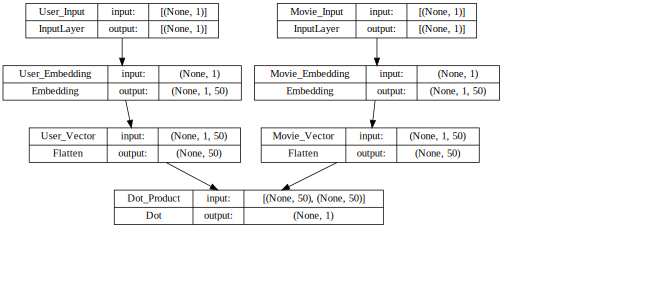

In [114]:
model_visualization(model)

## Train model

In [115]:
model.summary()


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 User_Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Movie_Input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 User_Embedding (Embedding)  (None, 1, 50)                47200     ['User_Input[0][0]']          
                                                                                                  
 Movie_Embedding (Embedding  (None, 1, 50)                84150     ['Movie_Input[0][0]']         
 )                                                                                         

In [116]:
optimizer = Adam(learning_rate = 0.0005)

model.compile(loss='mean_squared_error', optimizer = optimizer)

In [117]:

batch_size = 128
epochs = 20

# Define the filepath for saving the best model
filepath = '../benchmark/best_model'

# Create a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with the ModelCheckpoint callback
history = model.fit(
    x=[x_train['user id'], x_train['movie id']],
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=([x_test['user id'], x_test['movie id']], y_test),
    callbacks=[checkpoint]  # Include the ModelCheckpoint callback
)


Epoch 1/20



Epoch 1: val_loss improved from inf to 13.07799, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 2s - loss: 13.6113 - val_loss: 13.0780 - 2s/epoch - 3ms/step
Epoch 2/20

Epoch 2: val_loss improved from 13.07799 to 4.07834, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 8.7141 - val_loss: 4.0783 - 1s/epoch - 2ms/step
Epoch 3/20

Epoch 3: val_loss improved from 4.07834 to 1.64646, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 2s - loss: 2.4249 - val_loss: 1.6465 - 2s/epoch - 2ms/step
Epoch 4/20

Epoch 4: val_loss improved from 1.64646 to 1.20864, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 2s - loss: 1.3483 - val_loss: 1.2086 - 2s/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_loss improved from 1.20864 to 1.05254, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 1.0752 - val_loss: 1.0525 - 1s/epoch - 2ms/step
Epoch 6/20

Epoch 6: val_loss improved from 1.05254 to 0.97904, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.9660 - val_loss: 0.9790 - 1s/epoch - 2ms/step
Epoch 7/20

Epoch 7: val_loss improved from 0.97904 to 0.94201, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.9122 - val_loss: 0.9420 - 1s/epoch - 2ms/step
Epoch 8/20

Epoch 8: val_loss improved from 0.94201 to 0.91913, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.8804 - val_loss: 0.9191 - 1s/epoch - 2ms/step
Epoch 9/20

Epoch 9: val_loss improved from 0.91913 to 0.90532, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.8585 - val_loss: 0.9053 - 1s/epoch - 2ms/step
Epoch 10/20

Epoch 10: val_loss improved from 0.90532 to 0.89332, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.8413 - val_loss: 0.8933 - 1s/epoch - 2ms/step
Epoch 11/20

Epoch 11: val_loss improved from 0.89332 to 0.88370, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.8262 - val_loss: 0.8837 - 1s/epoch - 2ms/step
Epoch 12/20

Epoch 12: val_loss improved from 0.88370 to 0.87716, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.8130 - val_loss: 0.8772 - 1s/epoch - 2ms/step
Epoch 13/20

Epoch 13: val_loss improved from 0.87716 to 0.87002, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 2s - loss: 0.8000 - val_loss: 0.8700 - 2s/epoch - 3ms/step
Epoch 14/20

Epoch 14: val_loss improved from 0.87002 to 0.86674, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.7881 - val_loss: 0.8667 - 1s/epoch - 2ms/step
Epoch 15/20

Epoch 15: val_loss improved from 0.86674 to 0.85985, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.7763 - val_loss: 0.8599 - 1s/epoch - 2ms/step
Epoch 16/20

Epoch 16: val_loss improved from 0.85985 to 0.85632, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.7646 - val_loss: 0.8563 - 1s/epoch - 2ms/step
Epoch 17/20

Epoch 17: val_loss improved from 0.85632 to 0.85339, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 2s - loss: 0.7534 - val_loss: 0.8534 - 2s/epoch - 2ms/step
Epoch 18/20

Epoch 18: val_loss improved from 0.85339 to 0.85003, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 2s - loss: 0.7422 - val_loss: 0.8500 - 2s/epoch - 3ms/step
Epoch 19/20

Epoch 19: val_loss improved from 0.85003 to 0.84728, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.7307 - val_loss: 0.8473 - 1s/epoch - 2ms/step
Epoch 20/20

Epoch 20: val_loss improved from 0.84728 to 0.84493, saving model to ../benchmark/best_model.pt
INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


INFO:tensorflow:Assets written to: ../benchmark/best_model.pt/assets


625/625 - 1s - loss: 0.7186 - val_loss: 0.8449 - 1s/epoch - 2ms/step


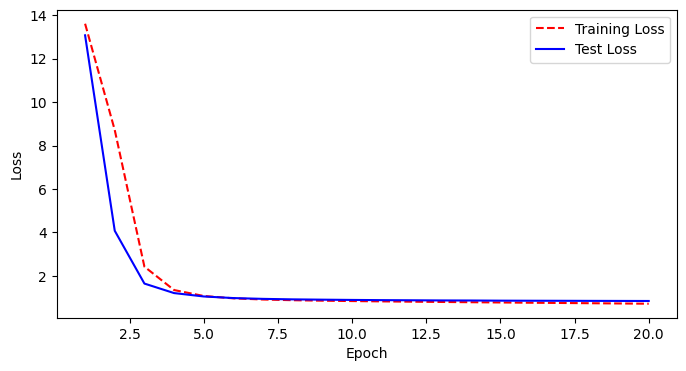

In [119]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [122]:
import numpy as np
score = model.evaluate([x_test['user id'], x_test['movie id']], y_test)

print('RMSE: {:.4f}'.format(np.sqrt(score)))


625/625 [==============================] - 1s 944us/step - loss: 0.8449
RMSE: 0.9192
